In [1]:
import spacy

In [29]:
%%capture
#!python -m spacy download nl_core_news_lg
!python -m spacy download en_core_web_lg

In [30]:
import en_core_web_lg
nlp = en_core_web_lg.load()
doc = nlp("This is a sentence.")
print([(w.text, w.pos_) for w in doc])

[('This', 'PRON'), ('is', 'AUX'), ('a', 'DET'), ('sentence', 'NOUN'), ('.', 'PUNCT')]


In [31]:
doc.vector[:10]

array([-0.0693734 ,  0.26776582, -0.13480794,  0.026144  ,  0.0945714 ,
       -0.1304826 ,  0.0398684 , -0.30131537,  0.0163348 ,  2.28744   ],
      dtype=float32)

In [32]:
import pandas as pd
import numpy as np

In [33]:
dat = pd.read_csv("aut_semdis_input.csv")
dat

,id,item,response,response_id,object,respondent_id,temperature
0,1,chair,doorstop,2022040001,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67
1,2,chair,start a fire,2022040002,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67
2,3,chair,prop up a table or chair leg,2022040003,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67
3,4,chair,paperweight,2022040004,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67
4,5,chair,make art such as by decoupaging it onto a canv...,2022040005,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67
...,...,...,...,...,...,...,...
1638,1639,chair,rolls,20167316,tin can,BP20160002,NaN
1639,1640,chair,money box,20167317,tin can,BP20160002,NaN
1640,1641,chair,seat cover,20167318,tin can,BP20160002,NaN
1641,1642,chair,reflector on bicycle,20167319,tin can,BP20160002,NaN


In [61]:
eucl_item_resp = [np.linalg.norm(x.vector - y.vector) for x,y in zip(nlp.pipe(dat.item.values), nlp.pipe(dat.response.values))]
eucl_objc_resp = [np.linalg.norm(x.vector - y.vector) for x,y in zip(nlp.pipe(dat.object.values), nlp.pipe(dat.response.values))]

In [38]:
cos_sim = lambda x,y: np.dot(x,y)/np.linalg.norm(x)/np.linalg.norm(y)
cos_dist_item_resp = [1-cos_sim(x.vector,y.vector) for x,y in zip(nlp.pipe(dat.item.values), nlp.pipe(dat.response.values))]

/var/folders/yd/hdk69w9n5lv3pq9zq2jq1y5w0000gn/T/ipykernel_39908/717211845.py:1: RuntimeWarning: invalid value encountered in float_scalars
  cos_sim = lambda x,y: np.dot(x,y)/np.linalg.norm(x)/np.linalg.norm(y)


nr of errors:  1
 elements with error: [971]


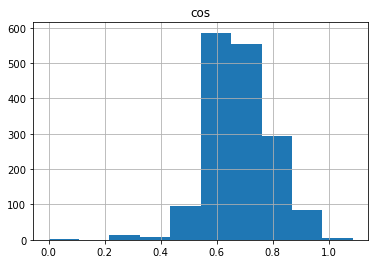

In [47]:
pd.DataFrame({"cos":cos_dist_item_resp}).hist()
print("nr of errors: ", np.sum(np.isnan(cos_dist_item_resp)))
print(" elements with error: %s" % (np.where(np.isnan(cos_dist_item_resp) == True)))

In [52]:
print(dat.iloc[971])
nlp(dat.iloc[971].response).vector

id                       972
item                   chair
response         firelighter
response_id         20161284
object                  book
respondent_id     BP20160029
temperature              NaN
Name: 971, dtype: object


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [60]:
cos_dist_item_resp[971] = 1-cos_sim(nlp("fire lighter").vector, nlp("chair").vector) 

In [62]:
cos_dist_objc_resp = [1-cos_sim(x.vector,y.vector) for x,y in zip(nlp.pipe(dat.object.values), nlp.pipe(dat.response.values))]

/var/folders/yd/hdk69w9n5lv3pq9zq2jq1y5w0000gn/T/ipykernel_39908/717211845.py:1: RuntimeWarning: invalid value encountered in float_scalars
  cos_sim = lambda x,y: np.dot(x,y)/np.linalg.norm(x)/np.linalg.norm(y)


In [64]:
cos_dist_objc_resp[971] = 1-cos_sim(nlp("fire lighter").vector, nlp("book").vector) 

In [65]:
dat['eucl_item_resp'] = eucl_item_resp
dat['eucl_objc_resp'] = eucl_objc_resp
dat['cos_dist_item_resp'] = cos_dist_item_resp
dat['cos_dist_objc_resp'] = cos_dist_objc_resp

In [66]:
dat

,id,item,response,response_id,object,respondent_id,temperature,eucl_item_resp,eucl_objc_resp,cos_dist_item_resp,cos_dist_objc_resp
0,1,chair,doorstop,2022040001,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,8.658492,8.365611,0.854830,0.847086
1,2,chair,start a fire,2022040002,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,6.871257,6.382291,0.683055,0.639192
2,3,chair,prop up a table or chair leg,2022040003,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,4.980463,6.307006,0.297942,0.650515
3,4,chair,paperweight,2022040004,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,8.695191,8.987339,0.830964,0.939968
4,5,chair,make art such as by decoupaging it onto a canv...,2022040005,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,6.324841,5.784203,0.598833,0.540887
...,...,...,...,...,...,...,...,...,...,...,...
1638,1639,chair,rolls,20167316,tin can,BP20160002,NaN,8.034032,6.342345,0.765450,0.673499
1639,1640,chair,money box,20167317,tin can,BP20160002,NaN,7.089824,4.235904,0.694928,0.397266
1640,1641,chair,seat cover,20167318,tin can,BP20160002,NaN,5.782039,5.718820,0.422534,0.642658
1641,1642,chair,reflector on bicycle,20167319,tin can,BP20160002,NaN,6.752543,4.944438,0.663697,0.611948


In [69]:
dat.to_csv("aut_semdis_input_w_dists.csv")